In [1]:
!pip install -q diffusers transformers accelerate peft torchvision

Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
vision_model.embeddings.position_ids | UNEXPECTED |  | 
text_model.embeddings.position_ids   | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


🤫 [GRADER] Initial Hidden Preference Set (Hidden from Agent)        :charcoal pencil sketch, black and white, rough lines.
Loading Tiny-SD Generator in pure FP32 (Safe Mode)...


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--segmind--tiny-sd/snapshots/cad0bd7495fa6c4bcca01b19a723dc91627fe84f/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--segmind--tiny-sd/snapshots/cad0bd7495fa6c4bcca01b19a723dc91627fe84f/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--segmind--tiny-sd/snapshots/cad0bd7495fa6c4bcca01b19a723dc91627fe84f/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--segmind--tiny-sd/snapshots/cad0bd7495fa6c4bcca01b19a723dc91627fe84f/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.



--- Epoch 1 ---
🔍 Exploring -> Appended guess: 'pixel art'


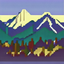

📊 Grader Score: 1.00 / 10.0

--- Epoch 2 ---
🔍 Exploring -> Appended guess: 'pixel art'


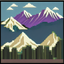

📊 Grader Score: 1.00 / 10.0

--- Epoch 3 ---
🔍 Exploring -> Appended guess: 'photorealistic'


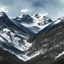

📊 Grader Score: 1.00 / 10.0

--- Epoch 4 ---
🔍 Exploring -> Appended guess: 'photorealistic'


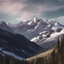

📊 Grader Score: 1.00 / 10.0

--- Epoch 5 ---
🔍 Exploring -> Appended guess: 'pixel art'


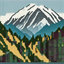

📊 Grader Score: 1.00 / 10.0

--- Epoch 6 ---
🔍 Exploring -> Appended guess: 'pencil sketch'


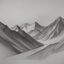

📊 Grader Score: 9.15 / 10.0
🌟 High score! Agent found a match. Saving to Replay Buffer.

--- Epoch 7 ---
🔍 Exploring -> Appended guess: 'pixel art'


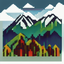

📊 Grader Score: 1.00 / 10.0

--- Epoch 8 ---
🔍 Exploring -> Appended guess: 'photorealistic'


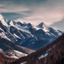

📊 Grader Score: 1.00 / 10.0

--- Epoch 9 ---
🔍 Exploring -> Appended guess: 'photorealistic'


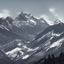

📊 Grader Score: 1.00 / 10.0

--- Epoch 10 ---
🔍 Exploring -> Appended guess: 'photorealistic'


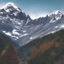

📊 Grader Score: 1.00 / 10.0

--- Epoch 11 ---
🔍 Exploring -> Appended guess: 'photorealistic'


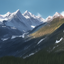

📊 Grader Score: 1.00 / 10.0

--- Epoch 12 ---
🔍 Exploring -> Appended guess: 'pencil sketch'


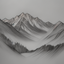

📊 Grader Score: 7.98 / 10.0
🌟 High score! Agent found a match. Saving to Replay Buffer.
🧠 [AGENT] Buffer full. Training LoRA to map 'A cute dog' to this new style...
📉 Training Loss: 0.6217

--- Epoch 13 ---
🚀 Exploiting -> Using trained LoRA adapter on base prompt.


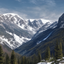

📊 Grader Score: 1.00 / 10.0

--- Epoch 14 ---
🚀 Exploiting -> Using trained LoRA adapter on base prompt.


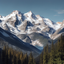

📊 Grader Score: 1.00 / 10.0

--- Epoch 15 ---
🚀 Exploiting -> Using trained LoRA adapter on base prompt.


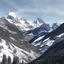

📊 Grader Score: 1.00 / 10.0

--- Epoch 16 ---
🚀 Exploiting -> Using trained LoRA adapter on base prompt.


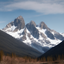

📊 Grader Score: 1.00 / 10.0

--- Epoch 17 ---
🚀 Exploiting -> Using trained LoRA adapter on base prompt.


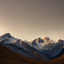

📊 Grader Score: 1.00 / 10.0

--- Epoch 18 ---
🚀 Exploiting -> Using trained LoRA adapter on base prompt.


KeyboardInterrupt: 

In [18]:
import torch
import torch.nn.functional as F
from torchvision import transforms
import random
from diffusers import StableDiffusionPipeline
from transformers import CLIPProcessor, CLIPModel
from peft import LoraConfig, get_peft_model
from IPython.display import display
from PIL import Image # Import PIL Image for resizing

# ==========================================
# 1. The Grader (10 Hidden Preferences)
# ==========================================
class HiddenGrader:
    def __init__(self, device="cuda"):
        self.device = device
        self.clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
        self.processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

        self.hidden_preferences = [
            "flat 2d vector art, anime style, highly stylized",
            "raw photograph, 8k resolution, photorealistic",
            "dark cyberpunk, neon lights, dystopian",
            "watercolor painting, soft edges, pastel colors",
            "3D rendered claymation style, plastic texture",
            "16-bit pixel art, retro gaming style",
            "impressionist oil painting, visible brush strokes",
            "synthwave, retrowave, purple and magenta grid",
            "charcoal pencil sketch, black and white, rough lines",
            "origami paper art, folded paper textures"
        ]
        # self.hidden_preferences = [
        #     "raw photograph, photorealistic, soft lighting",
        #     "16-bit pixel art, retro gaming style",
        #     "charcoal pencil sketch, black and white, rough lines"]
        # Start with a random preference
        self.current_pref_idx = random.randint(0, len(self.hidden_preferences) - 1)
        print(f"[GRADER] Initial Hidden Preference Set (Hidden from Agent)\
        :{self.hidden_preferences[self.current_pref_idx]}.")

    def trigger_drift(self):
        """Randomly switches to a new hidden preference."""
        old_idx = self.current_pref_idx
        while self.current_pref_idx == old_idx:
            self.current_pref_idx = random.randint(0, len(self.hidden_preferences) - 1)
        print(f"\n[GRADER] CONCEPT DRIFT OCCURRED! The user base has a new favorite style\
        : {self.hidden_preferences[self.current_pref_idx]}")

    def grade(self, image):
        """Scores image purely against the active hidden text prompt."""
        hidden_prompt = self.hidden_preferences[self.current_pref_idx]
        inputs = self.processor(
            text=[hidden_prompt], images=image, return_tensors="pt", padding=True
        ).to(self.device)

        with torch.no_grad():
            score = self.clip(**inputs).logits_per_image.item()

        # Normalize typical CLIP logits (~20-35) to a 1-10 scale
        normalized_score = max(1.0, min(10.0, score - 20.0))
        return normalized_score

# ==========================================
# 2. The Adaptive Router
# ==========================================
class AdaptiveRouter:
    def __init__(self, threshold=2.0):
        self.long_term_avg = 5.0
        self.short_term_avg = 5.0
        self.threshold = threshold # Allowable drop before flagging drift

    def check_for_drift(self, current_score):
        # Update short term quickly
        self.short_term_avg = 0.6 * self.short_term_avg + 0.4 * current_score
        divergence = self.long_term_avg - self.short_term_avg

        if divergence > self.threshold and current_score < 6.0:
            # Re-anchor the baseline to the new reality
            self.long_term_avg = current_score
            self.short_term_avg = current_score
            return True

        # Update long term slowly (if no drift)
        self.long_term_avg = 0.9 * self.long_term_avg + 0.1 * current_score
        return False

# ==========================================
# 3. The Continual Learning Agent (PEFT LoRA)
# ==========================================
class ContinualLearningAgent:
    def __init__(self, device="cuda"):
        self.device = device
        print("Loading Tiny-SD Generator in pure FP32 (Safe Mode)...")

        self.pipe = StableDiffusionPipeline.from_pretrained(
            "segmind/tiny-sd", torch_dtype=torch.float32
        ).to(device)
        self.pipe.set_progress_bar_config(disable=True)

        # PEFT Setup
        self.lora_config = LoraConfig(r=8, target_modules=["to_q", "to_k", "to_v", "to_out.0"])
        self.adapter_id = 0

        # Wrap UNet with PEFT and initialize first adapter
        self.pipe.unet = get_peft_model(self.pipe.unet, self.lora_config, adapter_name=f"era_{self.adapter_id}")

        self.setup_optimizer()

        self.is_exploring = True
        self.replay_buffer = []
        self.exploration_keywords = [
            "anime", "photorealistic", "cyberpunk", "watercolor",
            "claymation", "pixel art", "oil painting", "synthwave", "sketch"
        ]
        #self.exploration_keywords = ["pixel art", "pencil sketch", "photorealistic"]
    def setup_optimizer(self):
        # Only optimize the currently active LoRA parameters
        trainable_params = [p for p in self.pipe.unet.parameters() if p.requires_grad]
        # RESTORED: Back to a healthy learning rate now that our precision is stable
        self.optimizer = torch.optim.AdamW(trainable_params, lr=1e-4)

    def trigger_new_era(self):
        """Handles Catastrophic Forgetting by instantiating a new Expert LoRA"""
        self.is_exploring = True
        self.replay_buffer.clear()

        # Freeze old adapter, inject new one
        self.adapter_id += 1
        new_name = f"era_{self.adapter_id}"
        self.pipe.unet.add_adapter(new_name, self.lora_config)
        self.pipe.unet.set_adapter(new_name)

        # Lock old gradients, unlock new adapter gradients
        for name, param in self.pipe.unet.named_parameters():
            param.requires_grad = (new_name in name)

        self.setup_optimizer()
        print(f"[AGENT] Spun up fresh LoRA adapter: {new_name}")

    def generate(self, base_prompt):
        if self.is_exploring:
            # Temporarily disable adapters to prevent outdated style interference
            self.pipe.unet.disable_adapter_layers()
            guess = random.choice(self.exploration_keywords)
            active_prompt = f"{base_prompt}, {guess}"
            print(f"Exploring -> Appended guess: '{guess}'")
        else:
            self.pipe.unet.enable_adapter_layers()
            active_prompt = base_prompt
            print("Exploiting -> Using trained LoRA adapter on base prompt.")

        with torch.no_grad():
            return self.pipe(active_prompt, num_inference_steps=15).images[0]

    def train_lora_step(self, base_prompt):
        """Actual Stable Diffusion MSE Loss backpropagation into LoRA weights."""
        self.pipe.unet.train()
        self.pipe.unet.enable_adapter_layers()

        # Prepare Buffer
        images = [transforms.ToTensor()(img).unsqueeze(0).to(self.device) * 2.0 - 1.0 for img in self.replay_buffer]
        image_tensors = torch.cat(images, dim=0).to(dtype=self.pipe.dtype)

        # Train for a few steps to embed the concept
        for step in range(3):
            with torch.no_grad():
                latents = self.pipe.vae.encode(image_tensors).latent_dist.sample() * self.pipe.vae.config.scaling_factor
                noise = torch.randn_like(latents)
                bsz = latents.shape[0]
                timesteps = torch.randint(0, self.pipe.scheduler.config.num_train_timesteps, (bsz,), device=self.device).long()
                noisy_latents = self.pipe.scheduler.add_noise(latents, noise, timesteps)

                text_inputs = self.pipe.tokenizer([base_prompt]*bsz, padding="max_length", max_length=self.pipe.tokenizer.model_max_length, truncation=True, return_tensors="pt")
                text_embeddings = self.pipe.text_encoder(text_inputs.input_ids.to(self.device))[0]

            self.optimizer.zero_grad()

            noise_pred = self.pipe.unet(noisy_latents, timesteps, encoder_hidden_states=text_embeddings).sample
            loss = F.mse_loss(noise_pred, noise, reduction="mean")

            loss.backward()
            self.optimizer.step()

        self.pipe.unet.eval()
        return loss.item()

# ==========================================
# 4. The Main Loop
# ==========================================
def run_live_adaptation():
    grader = HiddenGrader()
    router = AdaptiveRouter(threshold=2.5)
    agent = ContinualLearningAgent()

    user_prompt = "Mountains"

    for epoch in range(1, 200):
        print(f"\n--- Epoch {epoch} ---")

        # Simulate unannounced concept drift
        if epoch%30 == 0:
            grader.trigger_drift()

        image = agent.generate(user_prompt)
        score = grader.grade(image)
        #display the image
        # Resize image for display to 256 pixels wide, maintaining aspect ratio
        if image:
            width, height = image.size
            new_width = 64
            new_height = int(new_width * (height / width))
            resized_image = image.resize((new_width, new_height), Image.Resampling.LANCZOS)
            display(resized_image)


        print(f"Grader Score: {score:.2f} / 10.0")

        is_drifting = router.check_for_drift(score)

        if is_drifting:
            print("[ROUTER] Divergence detected! The old LoRA is failing.")
            agent.trigger_new_era()
            continue

        # Self-Training Logic
        if agent.is_exploring:
            if score > 5:
                print(f"High score! Agent found a match. Saving to Replay Buffer.")
                agent.replay_buffer.append(image)

            if len(agent.replay_buffer) >= 3:
                print(f"[AGENT] Buffer full. Training LoRA to map <{user_prompt}> to this new style...")
                loss = agent.train_lora_step(user_prompt)
                print(f"Training Loss: {loss:.4f}")
                # Clear buffer and stop exploring once we have mapped the style
                agent.replay_buffer.clear()
                agent.is_exploring = False

run_live_adaptation()